In [1]:
# Het vinden van de txt-bestandsnamen voor analyse
import glob
bestanden = glob.glob("Data/*.txt")
print(bestanden)

['Data\\vmbo1.txt', 'Data\\vmbo10.txt', 'Data\\vmbo11.txt', 'Data\\vmbo12.txt', 'Data\\vmbo13.txt', 'Data\\vmbo14.txt', 'Data\\vmbo15.txt', 'Data\\vmbo16.txt', 'Data\\vmbo17.txt', 'Data\\vmbo18.txt', 'Data\\vmbo19.txt', 'Data\\vmbo2.txt', 'Data\\vmbo20.txt', 'Data\\vmbo21.txt', 'Data\\vmbo22.txt', 'Data\\vmbo23.txt', 'Data\\vmbo24.txt', 'Data\\vmbo25.txt', 'Data\\vmbo26.txt', 'Data\\vmbo27.txt', 'Data\\vmbo28.txt', 'Data\\vmbo29.txt', 'Data\\vmbo3.txt', 'Data\\vmbo30.txt', 'Data\\vmbo4.txt', 'Data\\vmbo5.txt', 'Data\\vmbo6.txt', 'Data\\vmbo7.txt', 'Data\\vmbo8.txt', 'Data\\vmbo9.txt', 'Data\\vwo1.txt', 'Data\\vwo10.txt', 'Data\\vwo11.txt', 'Data\\vwo12.txt', 'Data\\vwo13.txt', 'Data\\vwo14.txt', 'Data\\vwo15.txt', 'Data\\vwo16.txt', 'Data\\vwo17.txt', 'Data\\vwo18.txt', 'Data\\vwo19.txt', 'Data\\vwo2.txt', 'Data\\vwo20.txt', 'Data\\vwo21.txt', 'Data\\vwo22.txt', 'Data\\vwo23.txt', 'Data\\vwo24.txt', 'Data\\vwo25.txt', 'Data\\vwo26.txt', 'Data\\vwo27.txt', 'Data\\vwo28.txt', 'Data\\vwo2

In [32]:
# Alle signaalwoorden die worden geanalyseerd in categorieën door middel van lijsten
swl_totaal = [" ten eerste ", " ten tweede ", " ten derde ", " allereerst ", " eerst ", " om te beginnen ", " bovendien ", " ook ", " en ", " daarnaast ", " verder ", " niet alleen ", " maar ook ", " als laatste ", " ten slotte ", " tot slot ", " maar ", " echter ", " toch ", " wel ", " hoewel ", " alhoewel ", " weliswaar ", " integendeel ", " daarentegen ", " in tegenstelling tot ", " aan de ene kant ", " aan de andere kant ", " enerzijds ", " anderzijds ", " desalniettemin ", " desondanks ", " zo ", " net zo ", " net als ", " evenals ", " op dezelfde manier ", " zie ook ", " vergelijk ", " in vergelijking met ", " bijvoorbeeld ", " zoals ", " denk aan ", " neem ", " een voorbeeld ", " stel je voor ", " stel dat ", " ter illustratie ", " omdat ", " daarom ", " dus ", " om die reden ", " doordat ", " daardoor ", " waardoor ", " zodat ", " met het doel ", " om te ", " opdat ", " teneinde ", " waartoe ", " want ", " namelijk ", " immers ", " met het gevoel ", " ten gevolge van ", " kortom ", " heeft geleid tot ", " eerst ", " voordat ", " tijdens ", " tegelijkertijd ", " nadat ", " daarna ", " vervolgens ", " uiteindelijk ", " als laatste ", " ten slotte ", " tot slot ", " zodra ", " als ", " wanneer ", " op het moment dat ", " momenteel ", " terwijl ", " dus ", " kortom ", " al met al ", " met andere woorden ", " daaruit volgt ", " hieruit blijkt ", " samenvattend ", " concluderend ", " alles overziend ", " in een notendop "]
swl_opsomming = [" ten eerste ", " ten tweede ", " ten derde ", " allereerst ", " eerst ", " om te beginnen ", " bovendien ", " ook ", " en ", " daarnaast ", " verder ", " niet alleen ", " maar ook ", " als laatste ", " ten slotte ", " tot slot "]
swl_tegenstelling = [" maar ", " echter ", " toch ", " wel ", " hoewel ", " alhoewel ", " weliswaar ", " integendeel ", " daarentegen ", " in tegenstelling tot ", " aan de ene kant ", " aan de andere kant ", " enerzijds ", " anderzijds ", " desalniettemin ", " desondanks "]
swl_vergelijking = [" zo ", " net zo ", " net als ", " evenals ", " op dezelfde manier ", " zie ook ", " vergelijk ", " in vergelijking met "]
swl_voorbeeld = [" bijvoorbeeld ", " zoals ", " denk aan ", " neem ", " een voorbeeld ", " stel je voor ", " stel dat ", " ter illustratie "]
swl_argumentatie = [" omdat ", " daarom ", " dus ", " om die reden ", " doordat ", " daardoor ", " waardoor ", " zodat ", " met het doel ", " om te ", " opdat ", " teneinde ", " waartoe ", " want ", " namelijk ", " immers ", " met het gevoel ", " ten gevolge van ", " kortom ", " heeft geleid tot "]
swl_tijdsverloop = [" eerst ", " voordat ", " tijdens ", " tegelijkertijd ", " nadat ", " daarna ", " vervolgens ", " uiteindelijk ", " als laatste ", " ten slotte ", " tot slot ", " zodra ", " als ", " wanneer ", " op het moment dat ", " momenteel ", " terwijl "]
swl_samenvattingconclusie = [" dus ", " kortom ", " al met al ", " met andere woorden ", " daaruit volgt ", " hieruit blijkt ", " samenvattend ", " concluderend ", " alles overziend ", " in een notendop "]

In [4]:
# Importeren en downloaden punctuation van de nltk-module
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\desir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# (?) importeren punctuation van string
from string import punctuation

def remove_punctuation(text):
    no_punctuation= []
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        if token not in punctuation and token not in ['``',"''","..."]:
            no_punctuation.append(" " + token + " ")
#     print(no_punctuation)
    return no_punctuation

In [21]:
# Elk item in de lijst "no_punctuation" wordt in lower-case veranderd
def replace_uppercase(no_punct):
    for i in range(len(no_punct)):
        no_punct[i] = no_punct[i].lower()

#     print(no_punct)
    return no_punct

In [34]:
# Functie voor het tellen van het aantal signaalwoorden
def tel_signaalwoorden(tekst, signaalwoorden):
    aantal = 0
    for signaalwoord in signaalwoorden:
        aantal += tekst.count(signaalwoord)
    return aantal

In [26]:
# Functie voor het analyseren van het meegegeven bestand
def analyseer_bestand(bestandsnaam, tekst, niveau):
    rij = dict()
    rij['bestandnaam'] = bestandsnaam
    rij['lengte'] = len(tekst)
    rij['niveau'] = niveau
    rij['opsomming'] = tel_signaalwoorden(tekst, swl_opsomming)
    rij['tegenstelling'] = tel_signaalwoorden(tekst, swl_tegenstelling)                 
    rij['vergelijking'] = tel_signaalwoorden(tekst, swl_vergelijking)
    rij['voorbeeld'] = tel_signaalwoorden(tekst, swl_voorbeeld)
    rij['argumentatie'] = tel_signaalwoorden(tekst, swl_argumentatie)
    rij['tijdsverloop'] = tel_signaalwoorden(tekst, swl_tijdsverloop)
    rij['samenvattingconclusie'] = tel_signaalwoorden(tekst, swl_samenvattingconclusie)
    rij['totaal_signaalwoorden'] = tel_signaalwoorden(tekst, swl_totaal)
    return rij


In [36]:
# For-loops om de niveaus te onderscheiden in de resultaten
import os 
import glob
resultaten = []
for filename in glob.glob("Data/*.txt"):
    niveau = ""
    for letter in filename:
        if letter.isdigit():
            break;
        else:
            niveau = niveau + letter
            
    with open(filename) as f:
        tekst = f.read()
        
    no_punct = remove_punctuation(tekst)
    lowercase = replace_uppercase(no_punct)
    resultaat = analyseer_bestand(filename, lowercase, niveau[5::])  # niveau bevat iets als: Data/xxx door [5::] te doen verdwijnt Data/
    resultaten.append(resultaat)

In [37]:
resultaten

[{'bestandnaam': 'Data\\vmbo1.txt',
  'lengte': 2544,
  'niveau': 'vmbo',
  'opsomming': 82,
  'tegenstelling': 33,
  'vergelijking': 9,
  'voorbeeld': 3,
  'argumentatie': 16,
  'tijdsverloop': 37,
  'samenvattingconclusie': 5,
  'totaal_signaalwoorden': 185},
 {'bestandnaam': 'Data\\vmbo10.txt',
  'lengte': 631,
  'niveau': 'vmbo',
  'opsomming': 30,
  'tegenstelling': 4,
  'vergelijking': 1,
  'voorbeeld': 0,
  'argumentatie': 10,
  'tijdsverloop': 12,
  'samenvattingconclusie': 1,
  'totaal_signaalwoorden': 58},
 {'bestandnaam': 'Data\\vmbo11.txt',
  'lengte': 1418,
  'niveau': 'vmbo',
  'opsomming': 52,
  'tegenstelling': 13,
  'vergelijking': 2,
  'voorbeeld': 1,
  'argumentatie': 10,
  'tijdsverloop': 16,
  'samenvattingconclusie': 1,
  'totaal_signaalwoorden': 95},
 {'bestandnaam': 'Data\\vmbo12.txt',
  'lengte': 1969,
  'niveau': 'vmbo',
  'opsomming': 72,
  'tegenstelling': 27,
  'vergelijking': 4,
  'voorbeeld': 2,
  'argumentatie': 9,
  'tijdsverloop': 21,
  'samenvattingco

In [38]:
# Importeren van pandas om resultaten overzichtelijk te printen
import pandas as pd
df = pd.DataFrame(resultaten)
print(df)


        bestandnaam  lengte niveau  opsomming  tegenstelling  vergelijking  \
0    Data\vmbo1.txt    2544   vmbo         82             33             9   
1   Data\vmbo10.txt     631   vmbo         30              4             1   
2   Data\vmbo11.txt    1418   vmbo         52             13             2   
3   Data\vmbo12.txt    1969   vmbo         72             27             4   
4   Data\vmbo13.txt    1427   vmbo         68             17             0   
5   Data\vmbo14.txt     534   vmbo         16              8             2   
6   Data\vmbo15.txt    1152   vmbo         50              7             1   
7   Data\vmbo16.txt    2735   vmbo         89             50             8   
8   Data\vmbo17.txt     295   vmbo         18              4             0   
9   Data\vmbo18.txt    1472   vmbo         49             19             4   
10  Data\vmbo19.txt    1109   vmbo         41              9             3   
11   Data\vmbo2.txt     526   vmbo         19              7    

In [40]:
# variabele kolommen signaalwoorden
kolommen = ["opsomming", "tegenstelling", "vergelijking", "voorbeeld", "argumentatie", "tijdsverloop", "samenvattingconclusie", "totaal_signaalwoorden"]

In [41]:
#  importeren van numpy om data gemakkelijk te verwerken
import numpy as np

In [42]:
#  Functie om data te analyseren. 
#  Eerste parameter bevat een analysemethode, de tweede bevat de te analyseren data.
def analyse_data(analysis, slice_range):
    if analysis == 'gemiddelde':
        value = df[kolommen].iloc[slice_range].mean(axis=0)
        value_processed = np.around(value, 2)
    elif analysis == 'minimum':
        value = df[kolommen].iloc[slice_range].min(axis=0)
        value_processed = np.around(value, 2)
    elif analysis == 'maximum':
        value = df[kolommen].iloc[slice_range].max(axis=0)
        value_processed = np.around(value, 2)
    elif analysis == 'std_deviation':
        value = df[kolommen].iloc[slice_range]
        value_processed = (np.around((np.std(value)), 2))
    totaal_resultaat.append(dict(value_processed))

In [43]:
niveau_analyseren = []

range_vmbo = slice(0, 30, None)  # zelfde als :30  lees als: eerste dertig bestanden
range_vwo = slice(30, 60, None)  # zelfde als 30:60:  Lees als: alle bestanden na 30 tot 60 
#  Om meer bestanden te analyseren voeg meer ranges toe. eerstvolgende zou 60:90: zijn

niveau_analyseren.append(range_vmbo)
niveau_analyseren.append(range_vwo)

totaal_resultaat = []  # Aanmaken van list om dictionaries in op te slaan

for item in niveau_analyseren:
    analyse_data('gemiddelde', item)
    analyse_data('minimum', item)
    analyse_data('maximum', item)
    analyse_data('std_deviation', item)

In [44]:
# alle gemiddelden, minima, maxima en standaard deviaties in één panda
# totaal_resultaat = [dict(gemiddelde_vmbo), dict(gemiddelde_vwo), dict(minimum_vmbo), dict(minimum_vwo), dict(maximum_vmbo), dict(maximum_vwo), dict(sd_vmbo), dict(sd_vwo)]

df2 = pd.DataFrame(totaal_resultaat).T
df3 = df2.rename(columns = {0:"gemiddelde vmbo", 1:"minimum vmbo", 2:"maximum vmbo", 3:"sd vmbo", 4:"gemiddelde vwo", 5:"minimum vwo", 6:"maximum vwo", 7:"sd vwo"})
print(df3)

                       gemiddelde vmbo  minimum vmbo  maximum vmbo  sd vmbo  \
opsomming                        48.43           5.0         109.0    25.52   
tegenstelling                    18.90           2.0          50.0    12.41   
vergelijking                      3.23           0.0          13.0     3.27   
voorbeeld                         0.97           0.0           4.0     1.11   
argumentatie                     11.30           0.0          25.0     7.47   
tijdsverloop                     15.27           3.0          44.0    10.04   
samenvattingconclusie             2.97           0.0          13.0     2.95   
totaal_signaalwoorden           101.07          13.0         230.0    56.14   

                       gemiddelde vwo  minimum vwo  maximum vwo  sd vwo  
opsomming                       84.10         31.0        202.0   40.54  
tegenstelling                   30.23          8.0         88.0   18.00  
vergelijking                     6.93          0.0         17.0   

In [48]:
# van pandas naar een excel bestand om data op te slaan
import pandas as pd
file_name = 'hallo.xlsx'
df3.to_excel(file_name)

In [49]:
df = pd.DataFrame(df3)
df

,gemiddelde vmbo,minimum vmbo,maximum vmbo,sd vmbo,gemiddelde vwo,minimum vwo,maximum vwo,sd vwo
opsomming,48.43,5.0,109.0,25.52,84.10,31.0,202.0,40.54
tegenstelling,18.90,2.0,50.0,12.41,30.23,8.0,88.0,18.00
vergelijking,3.23,0.0,13.0,3.27,6.93,0.0,17.0,4.55
voorbeeld,0.97,0.0,4.0,1.11,3.10,0.0,16.0,3.61
argumentatie,11.30,0.0,25.0,7.47,18.77,5.0,52.0,11.78
tijdsverloop,15.27,3.0,44.0,10.04,27.70,6.0,101.0,17.10
samenvattingconclusie,2.97,0.0,13.0,2.95,4.77,0.0,14.0,3.45
totaal_signaalwoorden,101.07,13.0,230.0,56.14,175.60,71.0,489.0,88.24


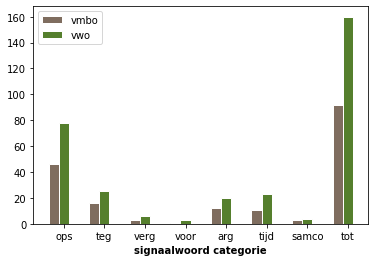

In [50]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bar_vmbo = [46, 16, 3, 1, 12, 11, 3, 92]
bar_vwo = [78, 25, 6, 3, 20, 23, 4, 160]
 
# Set position of bar on X axis
r1 = np.arange(len(bar_vmbo))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bar_vmbo, color='#7f6d5f', width=barWidth, edgecolor='white', label='vmbo')
plt.bar(r2, bar_vwo, color='#557f2d', width=barWidth, edgecolor='white', label='vwo')
 
# Add xticks on the middle of the group bars
plt.xlabel('signaalwoord categorie', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_vmbo))], ['ops', 'teg', 'verg', 'voor', 'arg', 'tijd', 'samco', 'tot'])
 
# Create legend & Show graphic
plt.legend()
plt.show()